# 1. Import Necessary libraries

In [1]:
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# 2. Import Data

In [2]:
cars_data = pd.read_csv('Cars.csv')
cars_data

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
76,322,36.900000,50,169.598513,16.132947
77,238,19.197888,115,150.576579,37.923113
78,263,34.000000,50,151.598513,15.769625
79,295,19.833733,119,167.944460,39.423099


# 3. Data Understanding

## 3.1 Initial Analysis

In [5]:
cars_data.shape

(81, 5)

In [6]:
cars_data.isna().sum()

HP     0
MPG    0
VOL    0
SP     0
WT     0
dtype: int64

In [7]:
cars_data.dtypes

HP       int64
MPG    float64
VOL      int64
SP     float64
WT     float64
dtype: object

## =======================================================================

# 3.2 Assumption Check

## 1. Linearity Check

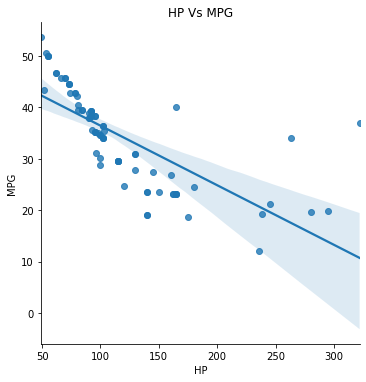

In [9]:
sns.lmplot(x='HP',y='MPG',data=cars_data)
plt.title('HP Vs MPG')
plt.show()

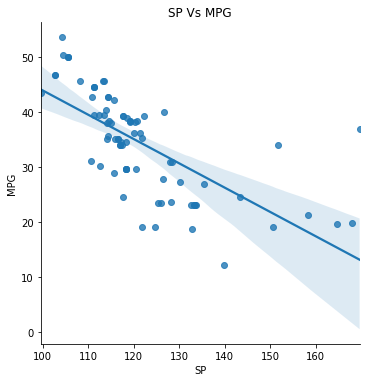

In [10]:
sns.lmplot(x='SP',y='MPG',data=cars_data)
plt.title('SP Vs MPG')
plt.show()

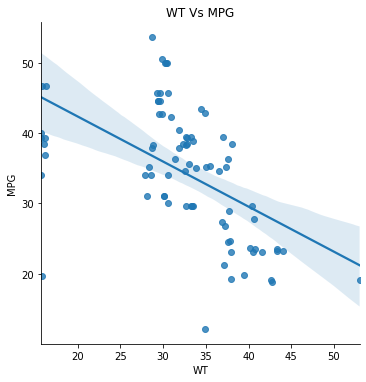

In [11]:
sns.lmplot(x='WT',y='MPG',data=cars_data)
plt.title('WT Vs MPG')
plt.show()

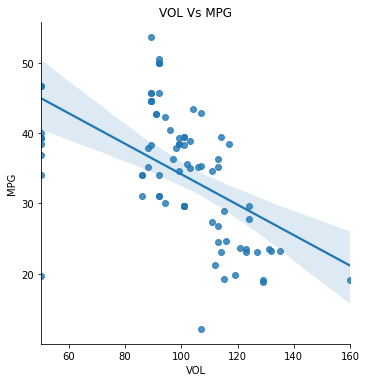

In [12]:
sns.lmplot(x='VOL',y='MPG',data=cars_data)
plt.title('VOL Vs MPG')
plt.show()

### Linearity Test is FAILED.

## 2. Normality Test

### Using Displot

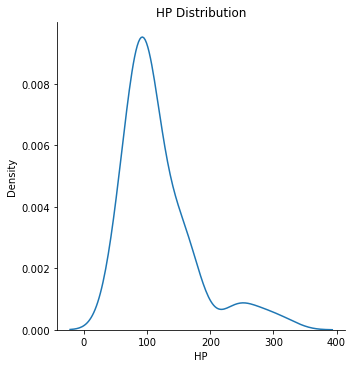

In [18]:
sns.displot(data=cars_data,x='HP',kind='kde')
plt.title('HP Distribution')
plt.show()

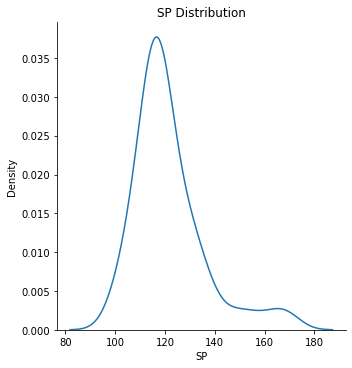

In [19]:
sns.displot(data=cars_data,x='SP',kind='kde')
plt.title('SP Distribution')
plt.show()

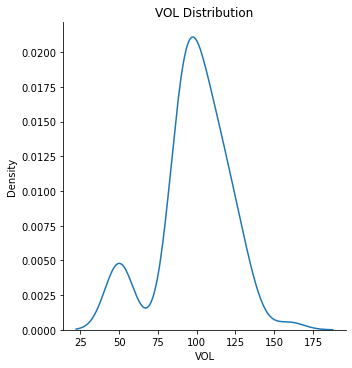

In [20]:
sns.displot(data=cars_data,x='VOL',kind='kde')
plt.title('VOL Distribution')
plt.show()

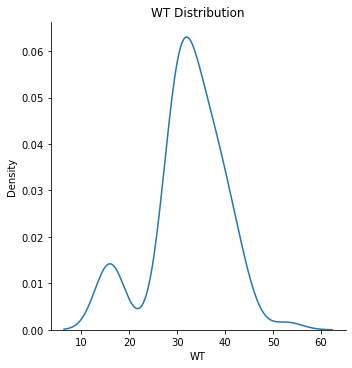

In [21]:
sns.displot(data=cars_data,x='WT',kind='kde')
plt.title('WT Distribution')
plt.show()

### Using Probplot [or] qqplot

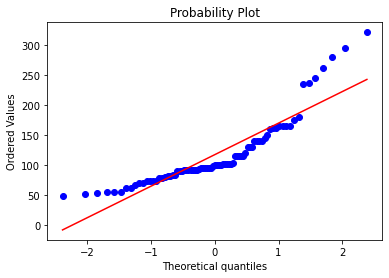

In [94]:
from scipy import stats
stats.probplot(x = cars_data['HP'],dist='norm',plot=plt)
plt.show()

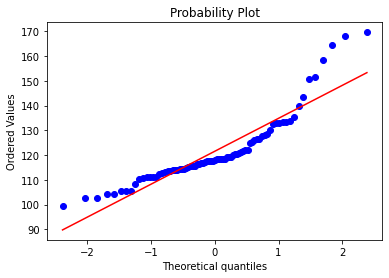

In [95]:
stats.probplot(x = cars_data['SP'],dist='norm',plot=plt)
plt.show()

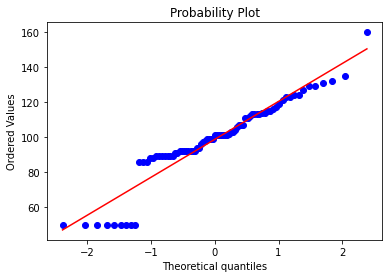

In [96]:
stats.probplot(x = cars_data['VOL'],dist='norm',plot=plt)
plt.show()

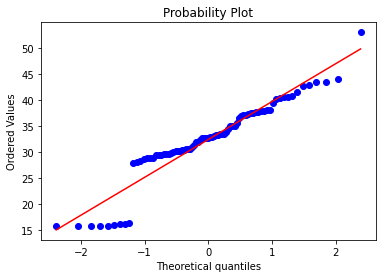

In [97]:
stats.probplot(x = cars_data['WT'],dist='norm',plot=plt)
plt.show()

### Normality Test is FAILED.

## 3. Multicollinearity Test

**Can be tested using any of the 2 following two methods:**

**1. Using Correlation Matrix**

**2. Using Variance Inflation Factor[VIF]**

In [24]:
cars_corr = cars_data.corr().round(2)
cars_corr

,HP,MPG,VOL,SP,WT
HP,1.00,-0.73,0.08,0.97,0.08
MPG,-0.73,1.00,-0.53,-0.69,-0.53
VOL,0.08,-0.53,1.00,0.10,1.00
SP,0.97,-0.69,0.10,1.00,0.10
WT,0.08,-0.53,1.00,0.10,1.00


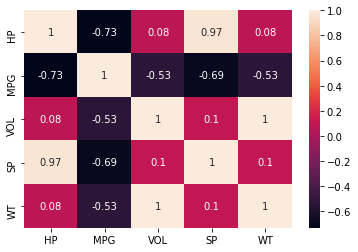

In [25]:
sns.heatmap(cars_corr,annot=True)
plt.show()

### There is Multicollinearity in this Data. So Multicollinearity Test is FAILED.

## 4. No AutoRegression

Yes there is no time-based inputs in my data.

## 5. Homoscedasticity Test || 6. Zero Residual Mean Test

**Note: These 2 test can be done post model training.**

## =======================================================================

# 4. Model Building

In [31]:
X = cars_data.drop('MPG',axis=1)
y = cars_data[['MPG']]

# 5. Model Training

In [34]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression() #Object creation / Instantiation
linear_model.fit(X,y)

LinearRegression()

In [58]:
linear_model.coef_

array([[-0.20544372, -0.33605084,  0.39562692,  0.40057409]])

In [59]:
linear_model.intercept_

array([30.67733585])

# 6. Model Testing

In [36]:
y_pred = linear_model.predict(X)

# 7. Model Evaluation

In [39]:
error = y - y_pred
error

,MPG
0,10.258747
1,7.624608
2,7.734060
3,3.157963
4,8.331584
...,...
76,15.617904
77,1.298838
78,7.863547
79,7.517122


## ========================================================================

## ....Back to Assumptions Check

## 5. Homoscedasticity Test

* Each Input Feature Vs Error - Similar variance across Zero Error.
* Make sure, all the input features are in a similar scale.

In [45]:
X.columns

Index(['HP', 'VOL', 'SP', 'WT'], dtype='object')

In [48]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
scaled_X = min_max_scaler.fit_transform(X)
scaled_X = pd.DataFrame(data=scaled_X,columns = X.columns)
scaled_X

,HP,VOL,SP,WT
0,0.000000,0.354545,0.065975,0.349986
1,0.021978,0.381818,0.084193,0.395709
2,0.021978,0.381818,0.084193,0.388381
3,0.076923,0.381818,0.198424,0.400142
4,0.014652,0.381818,0.069914,0.380215
...,...,...,...,...
76,1.000000,0.000000,1.000000,0.011267
77,0.692308,0.590909,0.728388,0.595690
78,0.783883,0.000000,0.742981,0.001523
79,0.901099,0.627273,0.976382,0.635921


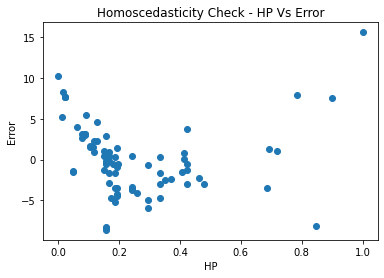

In [53]:
plt.scatter(x=scaled_X['HP'],y=error)
plt.title('Homoscedasticity Check - HP Vs Error')
plt.xlabel('HP')
plt.ylabel('Error')
plt.show()

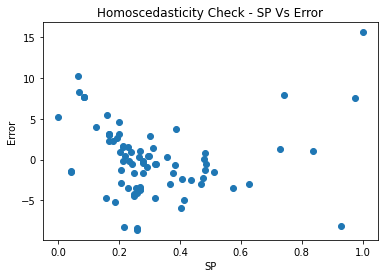

In [54]:
plt.scatter(x=scaled_X['SP'],y=error)
plt.title('Homoscedasticity Check - SP Vs Error')
plt.xlabel('SP')
plt.ylabel('Error')
plt.show()

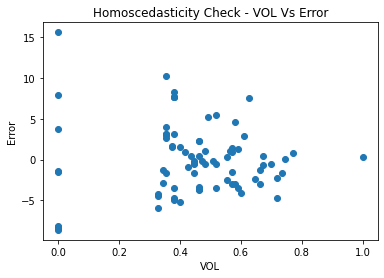

In [55]:
plt.scatter(x=scaled_X['VOL'],y=error)
plt.title('Homoscedasticity Check - VOL Vs Error')
plt.xlabel('VOL')
plt.ylabel('Error')
plt.show()

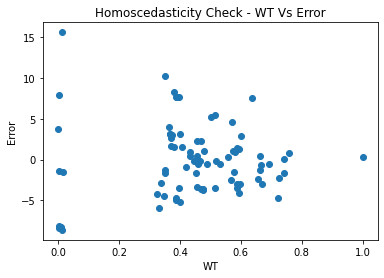

In [56]:
plt.scatter(x=scaled_X['WT'],y=error)
plt.title('Homoscedasticity Check - WT Vs Error')
plt.xlabel('WT')
plt.ylabel('Error')
plt.show()

### Homoscedasticity Test is Failed. There is Heteroscedasticity.

## 6. Zero Residual Mean Test

It is a plot between actual output Vs Predicted Output. 

Expectation : Perfect Linear Relationship.

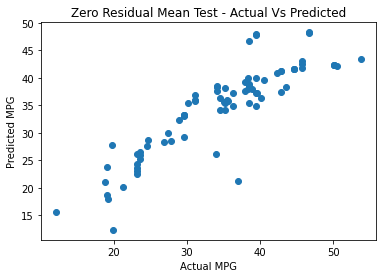

In [57]:
plt.scatter(x=y,y=y_pred,)
plt.title('Zero Residual Mean Test - Actual Vs Predicted')
plt.xlabel('Actual MPG')
plt.ylabel('Predicted MPG')
plt.show()

## ========================================================================

## Create a Reference data to understand how the input features need to behave with Output feature.

In [60]:
import numpy as np

In [76]:
X = np.random.randn(81)
y = X*10 + np.random.rand(81)*3

In [77]:
demo_data = pd.DataFrame(data = [X,y]).T
demo_data.columns = ['X','y']
demo_data

,X,y
0,-2.034044,-19.885311
1,0.314168,3.412669
2,-0.897266,-8.497258
3,-0.609219,-3.772339
4,-0.077436,2.029056
...,...,...
76,-0.114120,-0.814949
77,-0.717279,-6.721088
78,0.481506,5.420225
79,-1.742801,-14.958679


## 1. Linearity Test

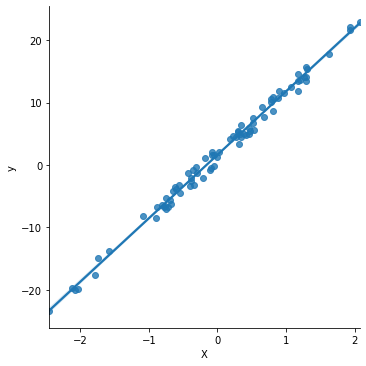

In [78]:
sns.lmplot(x='X',y='y',data=demo_data)
plt.show()

### Linearity Test is passed.

## 2. Normality Test

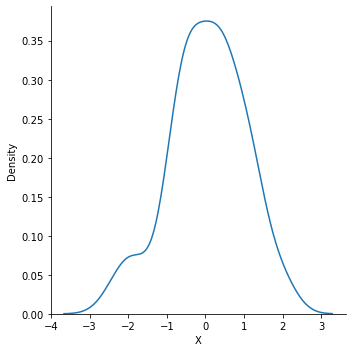

In [80]:
sns.displot(data=demo_data,x = 'X',kind='kde')
plt.show()

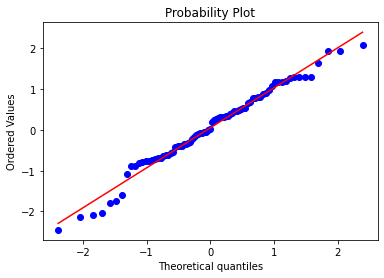

In [98]:
stats.probplot(x = demo_data['X'],dist='norm',plot=plt)
plt.show()

### Normality Test is passed.

## Model Building

In [82]:
X = demo_data[['X']]
y = demo_data[['y']]

## Model Training

In [83]:
linear_model_2 = LinearRegression()
linear_model_2.fit(X,y)

LinearRegression()

## Model Testing

In [85]:
y_pred = linear_model_2.predict(X)

## Model Evaluation

In [87]:
error = y - y_pred

## 3. Homoscedasticity Test

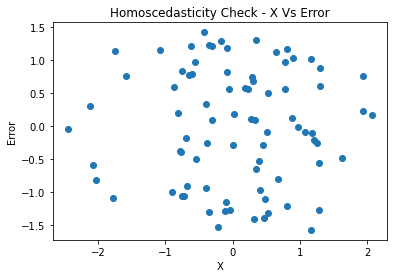

In [89]:
plt.scatter(x=demo_data['X'],y=error)
plt.title('Homoscedasticity Check - X Vs Error')
plt.xlabel('X')
plt.ylabel('Error')
plt.show()

### Homoscedasticity Test is passed.

## 4. Zero Residual Mean test

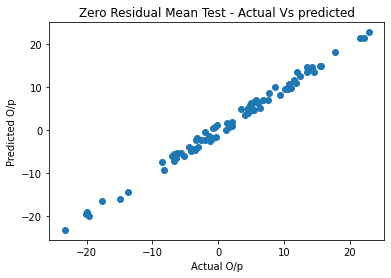

In [90]:
plt.scatter(x=y,y=y_pred)
plt.title('Zero Residual Mean Test - Actual Vs predicted')
plt.xlabel('Actual O/p')
plt.ylabel('Predicted O/p')
plt.show()

## =======================================================================

## Linear Regression using StatsModels for Understanding Evaluation Metrics

In [4]:
import statsmodels.formula.api as smf
linear_model = smf.ols(formula = 'MPG ~ HP + SP + VOL + WT', data = cars_data).fit()

In [5]:
linear_model.params

Intercept    30.677336
HP           -0.205444
SP            0.395627
VOL          -0.336051
WT            0.400574
dtype: float64

In [8]:
linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     63.80
Date:                Mon, 06 Jun 2022   Prob (F-statistic):           1.54e-23
Time:                        20:59:10   Log-Likelihood:                -233.96
No. Observations:                  81   AIC:                             477.9
Df Residuals:                      76   BIC:                             489.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.6773     14.900      2.059      0.043       1.001      60.354
HP            -0.2054      0.039     -5.239      0.000      -0.284      -0.127
SP             0.3956      0.158      2.500      0.015       0.080       0.711
VOL           -0.3361      0.569     -0.591      0.556      -1.469       0.796
WT             0.4006      1.693      0.237      0.814      -2.972       3.773
==============================================================================
Omnibus:                       10.780   Durbin-Watson:                   1.403
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               11.722
Skew:                           0.707   Prob(JB):                      0.00285
Kurtosis:                       4.215   Cond. No.                     6.09e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [9]:
linear_model.pvalues

Intercept    0.042936
HP           0.000001
SP           0.014579
VOL          0.556294
WT           0.813649
dtype: float64

## =======================================================================

### Hypothesis Formula

##### H0: It is not a signifacant parameter.
##### Ha: It is a significant parameter.

## =======================================================================

In [21]:
model_1 = smf.ols(formula = 'MPG ~ HP', data = cars_data).fit()
print('AIC Value  : ',model_1.aic.round(2))
print('BIC Value  : ',model_1.bic.round(2))
print('R-square   : ',model_1.rsquared.round(4))
print('Adj.Rsquare: ',model_1.rsquared_adj.round(4))

AIC Value  :  530.75
BIC Value  :  535.53
R-square   :  0.5257
Adj.Rsquare:  0.5197


In [15]:
model_1.pvalues

Intercept    2.141975e-20
WT           6.255966e-01
VOL          4.800657e-01
dtype: float64

In [22]:
model_2 = smf.ols(formula = 'MPG ~ HP + VOL', data = cars_data).fit()
print('AIC Value  : ',model_2.aic.round(2))
print('BIC Value  : ',model_2.bic.round(2))
print('R-square   : ',model_2.rsquared.round(4))
print('Adj.Rsquare: ',model_2.rsquared_adj.round(4))

AIC Value  :  480.66
BIC Value  :  487.84
R-square   :  0.7507
Adj.Rsquare:  0.7443


In [23]:
model_3 = smf.ols(formula = 'MPG ~ HP + VOL + SP', data = cars_data).fit()
print('AIC Value  : ',model_3.aic.round(2))
print('BIC Value  : ',model_3.bic.round(2))
print('R-square   : ',model_3.rsquared.round(4))
print('Adj.Rsquare: ',model_3.rsquared_adj.round(4))

AIC Value  :  475.99
BIC Value  :  485.57
R-square   :  0.7704
Adj.Rsquare:  0.7614


In [24]:
model_4 = smf.ols(formula = 'MPG ~ HP + VOL + SP + WT', data = cars_data).fit()
print('AIC Value  : ',model_4.aic.round(2))
print('BIC Value  : ',model_4.bic.round(2))
print('R-square   : ',model_4.rsquared.round(4))
print('Adj.Rsquare: ',model_4.rsquared_adj.round(4))

AIC Value  :  477.93
BIC Value  :  489.9
R-square   :  0.7705
Adj.Rsquare:  0.7585


## Linear Regression using sklearn for Understanding Evaluation Metrics

In [25]:
cars_data

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
76,322,36.900000,50,169.598513,16.132947
77,238,19.197888,115,150.576579,37.923113
78,263,34.000000,50,151.598513,15.769625
79,295,19.833733,119,167.944460,39.423099


### Model Building

### Step 1: Separate your input and Output

In [28]:
X = cars_data.drop('MPG',axis = 1)
y = cars_data[['MPG']]

### Step 2: Model Validation Techniques

In [45]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=12, shuffle=True)

In [47]:
X_train.shape,y_train.shape #Training samples

((64, 4), (64, 1))

In [48]:
X_test.shape,y_test.shape

((17, 4), (17, 1))

### Model Training

In [49]:
from sklearn.linear_model import LinearRegression
lin_regres_model = LinearRegression()
lin_regres_model.fit(X_train,y_train)

LinearRegression()

### Model Testing || Model Evaluation

### 1. Training Data

In [54]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [50]:
y_pred_train = lin_regres_model.predict(X_train)

In [51]:
mean_squared_error(y_train,y_pred_train)

19.136456810926465

In [55]:
mean_absolute_error(y_train,y_pred_train)

3.3554914028814506

### 2. Test Data

In [52]:
y_pred_test = lin_regres_model.predict(X_test)

In [53]:
mean_squared_error(y_test,y_pred_test)

23.457874597619092

In [56]:
mean_absolute_error(y_test,y_pred_test)

3.5962462421802313

## =======================================================================

## MODEL OPTIMIZATION TECHNIQUES

## TAKEAWAY:

Here wrt to few datapoints, it is evident that most of the input features are not showing direct linear relationship with output varible. So we have to do some transformations to make to linear.

#### Data transformation techniques if the data is CONTINUOUS:

* Log Transformation
* Square Root Transformation
* Cube Root Transformation
* Reciprocal Transformation
* Boxcox Transformation
* Standard Scaler
* Min Max Scaler
* Robust Scaler

### Data transformation techniques if the data is DISCRETE:

* Label Encoding
* One Hot Encoding

In [57]:
import numpy as np

In [59]:
cars_data_2 = cars_data.copy()
cars_data_2

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
76,322,36.900000,50,169.598513,16.132947
77,238,19.197888,115,150.576579,37.923113
78,263,34.000000,50,151.598513,15.769625
79,295,19.833733,119,167.944460,39.423099


In [62]:
cars_data_2['log_HP']  = np.log(cars_data_2['HP'])
cars_data_2['log_SP']  = np.log(cars_data_2['SP'])
cars_data_2['log_WT']  = np.log(cars_data_2['WT'])
cars_data_2['log_VOL'] = np.log(cars_data_2['VOL'])
cars_data_2

,HP,MPG,VOL,SP,WT,log_HP,log_SP,log_WT,log_VOL
0,49,53.700681,89,104.185353,28.762059,3.891820,4.646172,3.359057,4.488636
1,55,50.013401,92,105.461264,30.466833,4.007333,4.658344,3.416639,4.521789
2,55,50.013401,92,105.461264,30.193597,4.007333,4.658344,3.407630,4.521789
3,70,45.696322,92,113.461264,30.632114,4.248495,4.731461,3.422049,4.521789
4,53,50.504232,92,104.461264,29.889149,3.970292,4.648816,3.397495,4.521789
...,...,...,...,...,...,...,...,...,...
76,322,36.900000,50,169.598513,16.132947,5.774552,5.133434,2.780864,3.912023
77,238,19.197888,115,150.576579,37.923113,5.472271,5.014472,3.635561,4.744932
78,263,34.000000,50,151.598513,15.769625,5.572154,5.021236,2.758086,3.912023
79,295,19.833733,119,167.944460,39.423099,5.686975,5.123633,3.674352,4.779123


## Performing Linearity Test

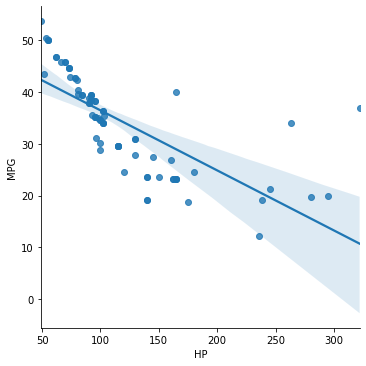

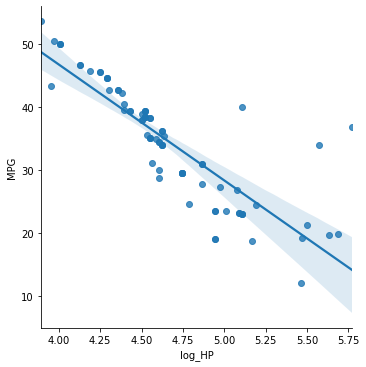

In [63]:
sns.lmplot(x='HP',y='MPG',data=cars_data_2)
sns.lmplot(x='log_HP',y='MPG',data=cars_data_2)
plt.show()

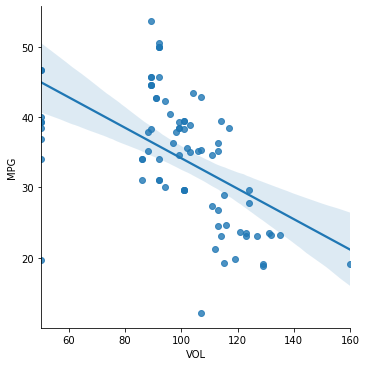

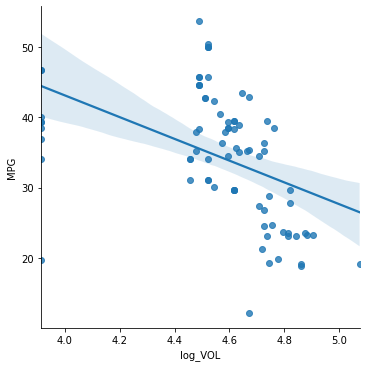

In [64]:
sns.lmplot(x='VOL',y='MPG',data=cars_data_2)
sns.lmplot(x='log_VOL',y='MPG',data=cars_data_2)
plt.show()

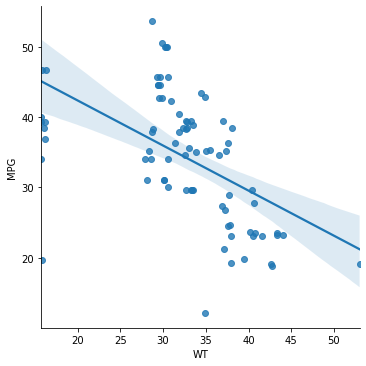

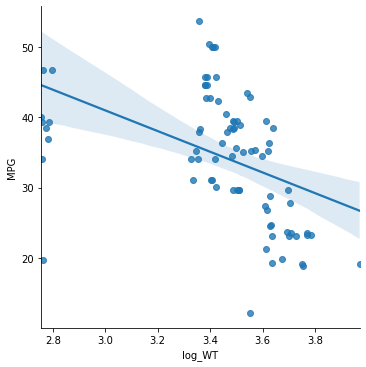

In [65]:
sns.lmplot(x='WT',y='MPG',data=cars_data_2)
sns.lmplot(x='log_WT',y='MPG',data=cars_data_2)
plt.show()

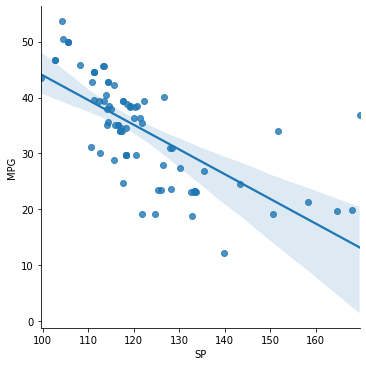

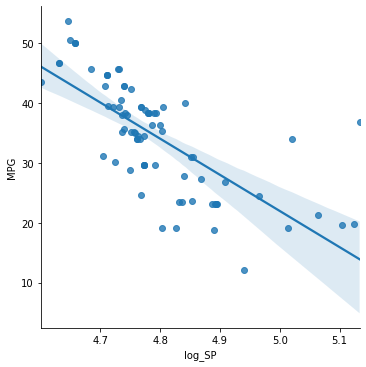

In [66]:
sns.lmplot(x='SP',y='MPG',data=cars_data_2)
sns.lmplot(x='log_SP',y='MPG',data=cars_data_2)
plt.show()

### Taking log inputs for model building

In [67]:
model_1 = smf.ols(formula = 'MPG ~ log_HP', data = cars_data_2).fit()
print('AIC Value  : ',model_1.aic.round(2))
print('BIC Value  : ',model_1.bic.round(2))
print('R-square   : ',model_1.rsquared.round(4))
print('Adj.Rsquare: ',model_1.rsquared_adj.round(4))

AIC Value  :  490.5
BIC Value  :  495.29
R-square   :  0.7114
Adj.Rsquare:  0.7078


In [68]:
model_2 = smf.ols(formula = 'MPG ~ log_HP + log_VOL', data = cars_data_2).fit()
print('AIC Value  : ',model_2.aic.round(2))
print('BIC Value  : ',model_2.bic.round(2))
print('R-square   : ',model_2.rsquared.round(4))
print('Adj.Rsquare: ',model_2.rsquared_adj.round(4))

AIC Value  :  444.03
BIC Value  :  451.22
R-square   :  0.8414
Adj.Rsquare:  0.8373


In [69]:
model_3 = smf.ols(formula = 'MPG ~ log_HP + log_VOL + log_SP', data = cars_data_2).fit()
print('AIC Value  : ',model_3.aic.round(2))
print('BIC Value  : ',model_3.bic.round(2))
print('R-square   : ',model_3.rsquared.round(4))
print('Adj.Rsquare: ',model_3.rsquared_adj.round(4))

AIC Value  :  399.1
BIC Value  :  408.68
R-square   :  0.9111
Adj.Rsquare:  0.9077


In [70]:
model_4 = smf.ols(formula = 'MPG ~ log_HP + log_VOL + log_SP + log_WT', data = cars_data_2).fit()
print('AIC Value  : ',model_4.aic.round(2))
print('BIC Value  : ',model_4.bic.round(2))
print('R-square   : ',model_4.rsquared.round(4))
print('Adj.Rsquare: ',model_4.rsquared_adj.round(4))

AIC Value  :  400.5
BIC Value  :  412.47
R-square   :  0.9118
Adj.Rsquare:  0.9071


## Explore the Script of Linear Regression given in LMS Dashboard.

1. VIF
2. Other Model Optimization Techniques like Outlier Removals - Cook's Distance, Influence Points.
3. Residual Plots

# THE END!!!